In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
print('numpy version: ' + np.__version__)
print('tf version: ' + tf.__version__)
print('keras version: ' + keras.__version__)

numpy version: 1.18.5
tf version: 2.3.1
keras version: 2.4.0


In [3]:
# Load data
student_df = pd.read_csv('../../datasets/student_mat_processed01.csv')

train_dataset = student_df.sample(frac=0.8, random_state=0)
test_dataset = student_df.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_G1_targets = train_features.pop('G1')
train_G2_targets = train_features.pop('G2')
train_G3_targets = train_features.pop('G3')

test_G1_targets = test_features.pop('G1')
test_G2_targets = test_features.pop('G2')
test_G3_targets = test_features.pop('G3')

train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sex,316.0,0.458861,0.499095,0.0,0.0,0.0,1.0,1.0
age,316.0,16.696203,1.288330,15.0,16.0,17.0,18.0,22.0
address,316.0,0.781646,0.413784,0.0,1.0,1.0,1.0,1.0
famsize,316.0,0.291139,0.455008,0.0,0.0,0.0,1.0,1.0
Medu,316.0,2.778481,1.087437,0.0,2.0,3.0,4.0,4.0
Fedu,316.0,2.528481,1.081950,0.0,2.0,2.0,3.0,4.0
traveltime,316.0,1.471519,0.714351,1.0,1.0,1.0,2.0,4.0
studytime,316.0,2.037975,0.842416,1.0,1.0,2.0,2.0,4.0
failures,316.0,0.348101,0.759509,0.0,0.0,0.0,0.0,3.0
schoolsup,316.0,0.136076,0.343413,0.0,0.0,0.0,0.0,1.0


In [4]:
# Normalizer Layer
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())
first = np.array(train_features[:1])

with np.printoptions(precision=4, suppress=True):
    print('First example: ', first)
    print()
    print('Normalized: ', normalizer(first).numpy())

[ 0.45886075 16.696203    0.7816456   0.29113925  2.778481    2.528481
  1.471519    2.0379746   0.34810126  0.13607594  0.613924    0.46518987
  0.49050632  0.81962025  0.95253164  0.8322785   0.34177214  3.927215
  3.221519    3.1392405   1.5031645   2.2974684   3.550633    5.655063
  0.8892405   0.1107595   0.11392405  0.886076    0.13607594  0.09810127
  0.37025318  0.24050634  0.15506329  0.0443038   0.0443038   0.54746836
  0.278481    0.08544303  0.37658226  0.2879747   0.10126583  0.23417722
  0.23417722  0.6898734   0.07594936]
First example:  [[ 0 17  1  0  4  4  2  3  0  0  1  1  0  0  1  1  1  4  3  3  1  2  4  4
   1  0  0  1  0  0  0  0  1  0  0  0  0  1  1  0  0  0  0  1  0]]

Normalized:  [[-0.9208  0.2362  0.5285 -0.6409  1.1251  1.3622  0.741   1.1438 -0.4591
  -0.3969  0.793   1.0722 -0.9812 -2.1316  0.2232  0.4489  1.3878  0.0797
  -0.2147 -0.1254 -0.5454 -0.2288  0.3277 -0.206   0.3529 -0.3529 -0.3586
   0.3586 -0.3969 -0.3298 -0.7668 -0.5627  2.3343 -0.2153 -0.215

In [5]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - (SS_res/SS_tot))
    #return (1 - SS_res/(SS_tot + K.epsilon())

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


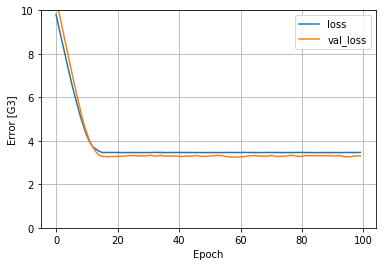

In [6]:
# Linear regression on variable
studytime = np.array(train_features['studytime'])

studytime_normalizer = preprocessing.Normalization(input_shape=[1,])
studytime_normalizer.adapt(studytime)

studytime_model = tf.keras.Sequential([
    studytime_normalizer,
    layers.Dense(units=1)
])

studytime_model.summary()

studytime_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError(), coeff_determination]
)

history = studytime_model.fit(
    train_features['studytime'], train_G3_targets,
    epochs=100, verbose=0, validation_split=0.2)

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [G3]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

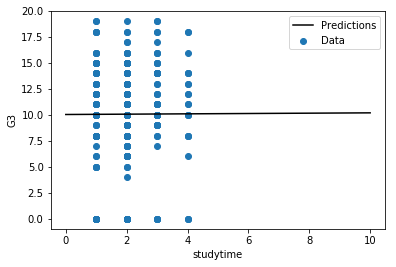

In [7]:
test_results = {}

test_results['studytime_model'] = studytime_model.evaluate(
    test_features['studytime'],
    test_G3_targets, verbose=0)

x = tf.linspace(0.0, 10, 20)
y = studytime_model.predict(x)

def plot_studytime(x, y):
  plt.scatter(train_features['studytime'], train_G3_targets, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('studytime')
  plt.ylabel('G3')
  plt.legend()

plot_studytime(x,y)

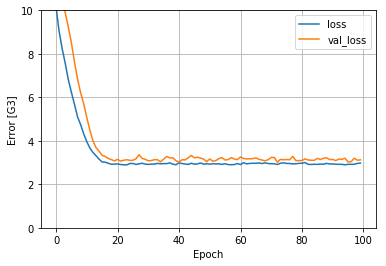

In [8]:
# Multiple inputs
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError(), coeff_determination])

history = linear_model.fit(
    train_features, train_G3_targets, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

plot_loss(history)
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_G3_targets, verbose=0)

In [9]:
# DNN regression
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(8, activation='relu'),
      layers.Dense(4, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(), coeff_determination])
  return model

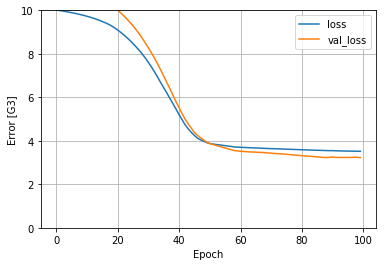

In [10]:
# One variable
dnn_studytime_model = build_and_compile_model(studytime_normalizer)
history = dnn_studytime_model.fit(
    train_features['studytime'], train_G3_targets,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)

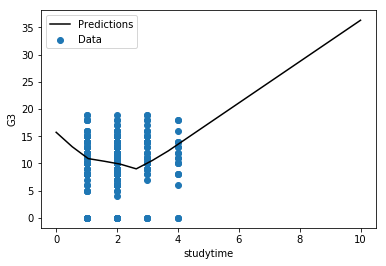

In [11]:
x = tf.linspace(0.0, 10, 20)
y = dnn_studytime_model.predict(x)
plot_studytime(x, y)

test_results['dnn_studytime_model'] = dnn_studytime_model.evaluate(
    test_features['studytime'], test_G3_targets,
    verbose=0)

In [12]:
# Full model
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 45)                91        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 368       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 500
Trainable params: 409
Non-trainable params: 91
_________________________________________________________________


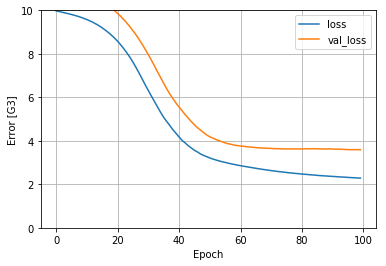

In [13]:
history = dnn_model.fit(
    train_features, train_G3_targets,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)

test_results['dnn_model'] = dnn_model.evaluate(test_features, test_G3_targets, verbose=0)

In [14]:
pd.DataFrame(test_results, index=['MeanAbsoluteError','RootMeanSquaredError', 'coeff_determination']).T

,MeanAbsoluteError,RootMeanSquaredError,coeff_determination
studytime_model,3.528087,4.640841,-0.056886
linear_model,3.417767,4.600086,-0.041033
dnn_studytime_model,3.440978,4.564406,-0.028129
dnn_model,3.983644,4.990716,-0.259730


In [15]:
# Create 30-16-8-1 FC NN
def create_model():
    model = keras.Sequential()
    model.add(layers.Dense(30, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(1, activation='softmax'))
    
    return model